# Grover's Algorithm


## Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Main Code

In [ ]:
class QuantumCircuit:
    def __init__(self, num_qubits=1):
        self.__num_qubits = num_qubits
        __initial = [0] * 2**num_qubits
        __initial[0] = 1
        self.__state_vector = np.array(__initial).reshape(-1, 1)

    def get_state_vector(self):
        """_summary_

        Returns:
            _type_: _description_
        """
        return self.__state_vector

    def compute_gates(self, index_gate):

        for index, gate in index_gate:
            if gate == "h" or gate == "H":
                self.H(index)

    def Measure(self):
        """Displays a probability vector of all the qubits returning a value in binary.

        Returns:
            Array: Probabilities Vector
        """
        SAMPLES = 1000
        prob_vector = np.random.multinomial(SAMPLES, self.__state_vector.flatten() ** 2)
        prob_vector = prob_vector / prob_vector.sum() # Normalize
        return prob_vector

    def H(self, qubit_index):
        gate = [np.eye(2)] * (self.__num_qubits)
        gate[qubit_index] = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
        combined_gate = np.kron(gate[0], gate[1])
        for g in gate[2:]:
            combined_gate = np.kron(combined_gate, g)
        self.__state_vector = np.dot(combined_gate, self.__state_vector)

    def oracle_operator(self, w):
        self.__state_vector[w] = self.__state_vector[w] * -1

    def diffusion_operator(self):
        # Create a ket state |0>^n and a bra state <0|^n
        # Multiply that outer product by 2
        # Finally, subtract by the Identity matrix of 2^n * 2^n.
        state_size = self.__num_qubits
        bra = np.zeros((1, 2**state_size))
        ket = np.zeros((2**state_size, 1))
        ket[0, 0] = 1
        bra[0, 0] = 1
        outer_product = 2 * np.dot(ket, bra)
        identity_matrix = np.eye(2**state_size)
        result = outer_product - identity_matrix
        self.__state_vector = np.dot(result, self.__state_vector)

    def grovers_algorithm(self, oracle_index, layers=None):
        if not layers:
          layers = int(np.floor(
    np.pi / (4 * np.arcsin(np.sqrt(1 / 2**self.__num_qubits)))
)) #Optimal number of layers
        gates_to_compute = []
        index_prob = []
        for i in range(self.__num_qubits):
            gates_to_compute.append((i, "h"))
        self.compute_gates(gates_to_compute)
        print("Initial:\n", circ.get_state_vector())
        for i in range(layers):
            print(f"Layer {i+1}, oracle index {oracle_index}:")
            circ.oracle_operator(oracle_index)
            self.compute_gates(gates_to_compute)
            self.diffusion_operator()
            self.compute_gates(gates_to_compute)
            # For the graph, save the probability of getting the qubit. TODO: Do not cheat by checking amplitudes.
            index_prob.append((self.__state_vector[oracle_index][0]) ** 2)
            print(circ.get_state_vector())
        return index_prob


circ = QuantumCircuit(10)
index_prob = circ.grovers_algorithm(128)
measurement = circ.Measure()


Initial:
 [[0.03125]
 [0.03125]
 [0.03125]
 ...
 [0.03125]
 [0.03125]
 [0.03125]]
Layer 1, oracle index 128:
[[0.03112793]
 [0.03112793]
 [0.03112793]
 ...
 [0.03112793]
 [0.03112793]
 [0.03112793]]
Layer 2, oracle index 128:
[[0.03088427]
 [0.03088427]
 [0.03088427]
 ...
 [0.03088427]
 [0.03088427]
 [0.03088427]]
Layer 3, oracle index 128:
[[0.03051996]
 [0.03051996]
 [0.03051996]
 ...
 [0.03051996]
 [0.03051996]
 [0.03051996]]
Layer 4, oracle index 128:
[[0.03003644]
 [0.03003644]
 [0.03003644]
 ...
 [0.03003644]
 [0.03003644]
 [0.03003644]]
Layer 5, oracle index 128:
[[0.02943558]
 [0.02943558]
 [0.02943558]
 ...
 [0.02943558]
 [0.02943558]
 [0.02943558]]
Layer 6, oracle index 128:
[[0.02871975]
 [0.02871975]
 [0.02871975]
 ...
 [0.02871975]
 [0.02871975]
 [0.02871975]]
Layer 7, oracle index 128:
[[0.02789172]
 [0.02789172]
 [0.02789172]
 ...
 [0.02789172]
 [0.02789172]
 [0.02789172]]
Layer 8, oracle index 128:
[[0.02695475]
 [0.02695475]
 [0.02695475]
 ...
 [0.02695475]
 [0.0269547

## Generate Histogram

Generates a histogram based on the probabilities returned after measuring the qubits.

*Question:* Should the `plot_probability_histogram` function be part of `QuantumCircuit`, a new class, or no class at all?


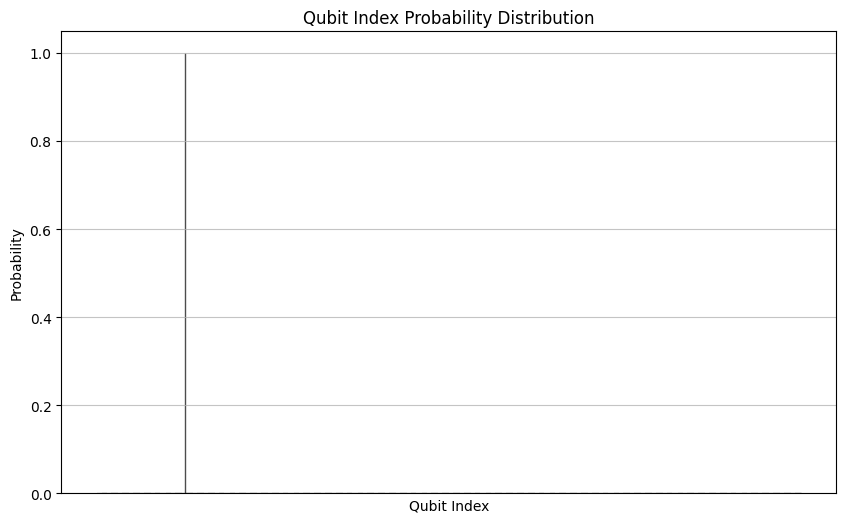

In [ ]:
def plot_prob_histogram(prob_vector):
    prob_vector = np.asarray(prob_vector)

    plt.figure(figsize=(10, 6))
    qubits = np.arange(len(prob_vector))

    plt.bar(qubits, prob_vector, alpha=0.7, color='blue', edgecolor='black')

    plt.title('Qubit Index Probability Distribution')
    plt.xlabel('Qubit Index')
    plt.ylabel('Probability')

    if len(prob_vector) > 5:
      plt.xticks([])
    else:
      plt.xticks(qubits)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

plot_prob_histogram(measurement)

## Scatter Plot


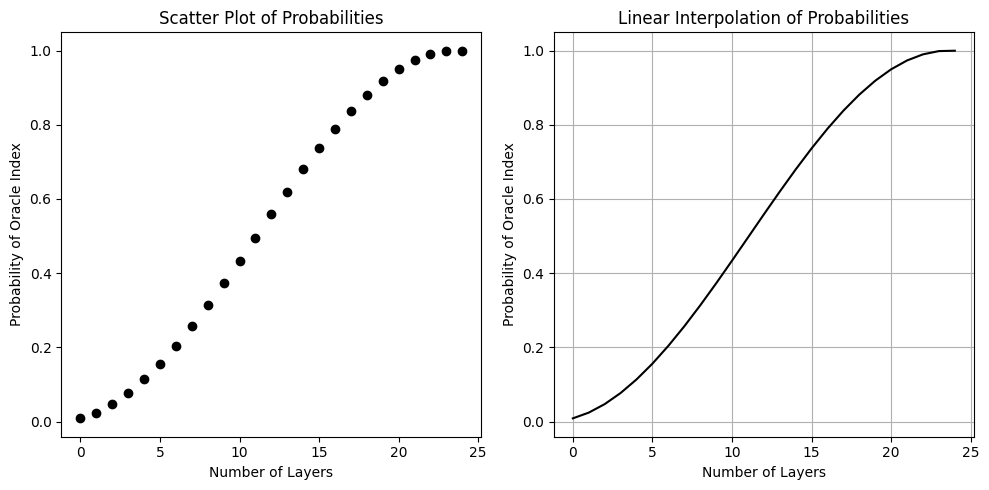

In [ ]:
t = np.arange(0, len(index_prob), 1) # (start, stop, step)
y = index_prob

plt.figure(figsize=(10, 5))

# Scatter plot
plt.subplot(1, 2, 1)
plt.plot(t, y, 'o', color='black')
plt.title('Scatter Plot of Probabilities')
plt.xlabel('Number of Layers')
plt.ylabel('Probability of Oracle Index')

# Linear interpolation
plt.subplot(1, 2, 2)
plt.plot(t, y, label='Data', color='black')
plt.title('Linear Interpolation of Probabilities')
plt.xlabel('Number of Layers')
plt.ylabel('Probability of Oracle Index')
plt.grid()

plt.tight_layout()
plt.show()